0858610 智慧計算所 周承翰

# DL HW06 Word Embedding
。HW  context : Use ML algo. to embed words into a vector space,then use dimensional reduction method to show embedding a 2D or plot. <br />
。Hint1 : Any algorithm(including word2vec) for embedding <br />
。Hint2 : Dimensional reduction method (ex : PCA/t-SNE)  <br />
。Hint3 : For Chinese language data , you can use jeiba or ckip to do word segmentation. <br />

# My Source
。Backbone : python gensim <br />
。Chinese Dataset : etttoday新聞網 <br />
。jeiba : for word segmentation <br />
。word2vec : gensim for embedding <br />
。t-SNE : sklearn for dimensional reduction <br />


### Step0 : 爬蟲-新聞標題與內文
參考https://gist.github.com/wutienyang/6bf22fdb1f7e704ae7b7fd280f16beda

In [4]:
# 載入python 套件
import requests
from bs4 import BeautifulSoup  

# 1 政治 17 財經 2 國際 6 社會 9 影劇
# 10 體育 20 3c 30 時尚 24 遊戲 5 生活

# 抓 title
#對政治板進行抓取
for tt in [17]: 
    title = []
    for n in range(9,11): #設定抓取的月份範圍
        for n2 in range(1,31): #設定抓取的日期範圍
            #建立抓取的url
            u = "https://www.ettoday.net/news/news-list-2019-"+str(n)+"-"+str(n2)+"-"+str(tt)+".htm"
            res = requests.get(u).text
            soup = BeautifulSoup(res, 'html.parser')
            soup = soup.find("div", class_="part_list_2")
            domian = "https://www.ettoday.net"
            for a in soup.find_all("h3"):
                p = a.a.string
                if p != None:
                    p = p.split('／')
                    if len(p) > 1:
                        title.append(p[1])
                    else:
                        title.append(p[0])

    with open("NLP/"+str(tt)+".txt", "a") as f:
        for t in title:
            f. write(t+"\n")


### Step1 : Load Dataset

In [5]:
#file.py
f = open('NLP/17.txt','r')
print(f.read())
f.close()
f = open('NLP/17.txt','r')
all_title = f.read()
print("Total word :",len(all_title))
f.close()

重啟核四無望？台大醫院前副院長打臉：「燃料棒根本不是問題！」
生活小確幸、桶裝瓦斯降價了！小家庭月省36元、小吃店月省270元
國內首座「金融科技創新園區」滿週年　繳出漂亮成績單
亞果生醫完成公開發行　執行長謝達仁一路走來靠創業信念
蘋果新品還沒登場關稅先來了　分析師：恐增加5億美元成本
台積電支持青年世代研發再生包材　推動網購包裝革命勇奪全國亞軍
傳統機車行升級轉型　經濟部主打三好政策全台走透透
「星展新加坡歡樂城」大遊行　總經理林鑫川率領團隊推廣文化
創新護墊、濕紙巾應用　大江生醫益菌革命產品在倫敦發明展奪金
金融業防搶才！　資科人才起薪比一般行員至少多1萬元
樂天商銀「接地氣」　九成採用本地員工
LINE Bank拚2020上半年開業　年底前招募逾百位專才
將來銀行　「斜槓青年」、「混血人才」最搶手
3團隊瘋搶這4類人才　文科生、理科生也可捧金飯碗
鴻海1.6兆負債被放大檢視　財務業界認為解讀方向有迷思
大同旗下綠能通過解散清算、撤銷公開發行兩案
境外資金匯回專法創造龐大商機　投資人、券商、產業全受益
投資高手！一銀上半年投資收益成長逾三成　今年努力拚百億元
華映董事長蔡江隆：訂單劇減至零產生鉅額虧損　公司不可能再運作
光寶科出售固態儲存事業部　東芝記憶體砸51.6億元接手
投資台灣正夯！自動販賣機霸主金雨斥資3億　打造智慧化產線助攻營運
勞動部長許銘春點名韓國瑜要提升勞權意識！　勞動列車若到高雄一定邀他
不玩了？光寶科出售固態儲存事業部   傳東芝接手
勞動部長許銘春點名大同與華映應負起責任　政府將組專案小組處理華映大裁員
外媒：Google Pixel手機生產線將從中國大陸移至越南
彩晶出運了　訂單旺到年底
降不降息　鮑威爾這樣說…
亞馬遜等企業聯合收購迪士尼旗下YES Network八成股權　
新台幣收盤升值3.2分　收在31.41元兌1美元
對抗市場大幅震盪！投信：資金轉向穩中求益資產　不用怕川普推文風向
在廢墟辦五星級婚禮！　解讀君品「宴會Airbnb」大計
華為首款5G手機Mate 30無法使用Google Apps　專家：應該沒人會買
64年台南幫元老公司　侯博明交棒前的最後一搏
台股收盤大漲155點飛越10,600點　三大法人合計買超175億元
住院醫師9月1日納入勞基法　勞動部：4680人受惠...上班工時不再無上限！
因應中美貿易戰擴大亞洲

### Step1.5 : Articut API

### Step2 : jieba
使用Jieba將中文句子斷詞

In [2]:
#!pip install jieba

In [5]:
import jieba
import logging

In [6]:
file_name = 'NLP/finance_seg.txt'
#seg_list = jieba.cut(all_title, cut_all=False)
output = open(file_name, 'w', encoding='utf-8')
words = jieba.cut(all_title, cut_all=False)
for word in words:
    output.write(word+' ')
output.write('\n')

output.close()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.492 seconds.
Prefix dict has been built succesfully.


In [7]:
seg = open(file_name, 'r')
print(seg.read())

重啟 核四無望 ？ 台大 醫 院前 副 院長 打臉 ： 「 燃料 棒 根本 不是 問題 ！ 」 
 生活 小確幸 、 桶裝 瓦斯 降價 了 ！ 小家庭 月 省 36 元 、 小吃店 月 省 270 元 
 國內 首座 「 金融 科技 創新園區 」 滿週 年 　 繳出 漂亮 成績 單 
 亞果 生醫 完成 公開 發行 　 執行長 謝達仁 一路 走來 靠 創業 信念 
 蘋果 新品 還沒 登場 關稅 先來 了 　 分析 師 ： 恐 增加 5 億 美元 成本 
 台積電 支持 青年 世代 研發 再生 包材 　 推動 網購 包裝 革命 勇奪 全國亞 軍 
 傳統 機車 行升級 轉型 　 經濟部 主打 三好 政策 全台 走 透透 
 「 星展 新加坡 歡樂城 」 大遊行 　 總經理 林鑫川率 領團隊 推廣 文化 
 創新護 墊 、 濕紙 巾 應用 　 大江 生醫益 菌 革命 產品 在 倫敦 發明展 奪金 
 金融 業防 搶 才 ！ 　 資科 人才 起薪 比 一般 行員 至少 多 1 萬元 
 樂天 商銀 「 接地 氣 」 　 九成 採用 本地 員工 
 LINE   Bank 拚 2020 上半年 開業 　 年底 前 招募 逾 百位 專才 
 將來 銀行 　 「 斜槓 青年 」 、 「 混血人 才 」 最 搶手 
 3 團隊 瘋 搶 這 4 類 人才 　 文科生 、 理科生 也 可 捧 金飯 碗 
 鴻海 1.6 兆 負債 被 放大 檢視 　 財務業界 認為 解讀 方向 有 迷思 
 大同 旗下 綠能 通過 解散 清算 、 撤銷 公開 發行 兩案 
 境外 資金匯 回 專法 創造 龐 大商 機 　 投資人 、 券商 、 產業 全 受益 
 投資 高手 ！ 一銀 上半年 投資 收益 成長 逾 三成 　 今年 努力 拚百億元 
 華映 董事 長 蔡江隆 ： 訂 單劇 減至 零產 生鉅額 虧損 　 公司 不 可能 再運作 
 光寶科 出售 固態 儲存 事業部 　 東芝 記憶體 砸 51.6 億元 接手 
 投資 台灣 正夯 ！ 自動 販賣機 霸主 金雨 斥資 3 億 　 打造 智慧 化產線 助攻 營運 
 勞動 部長 許銘春點 名 韓國瑜 要 提升 勞權 意識 ！ 　 勞動 列車 若 到 高雄 一定 邀 他 
 不玩 了 ？ 光寶科 出售 固態 儲存 事業部       傳東芝 接

### Step3 : word2vec
使用gensim models裡的 word2vec API

In [8]:
from gensim.models import word2vec

In [22]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = word2vec.LineSentence(file_name) #file_name = 'NLP/finance_seg.txt'
model = word2vec.Word2Vec(sentences, size=250)

model.save("NLP/word2vec.model")

2019-11-18 20:18:08,609 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-11-18 20:18:08,610 : INFO : collecting all words and their counts
2019-11-18 20:18:08,611 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-11-18 20:18:08,636 : INFO : collected 8308 word types from a corpus of 77796 raw words and 5658 sentences
2019-11-18 20:18:08,637 : INFO : Loading a fresh vocabulary
2019-11-18 20:18:08,642 : INFO : effective_min_count=5 retains 3526 unique words (42% of original 8308, drops 4782)
2019-11-18 20:18:08,642 : INFO : effective_min_count=5 leaves 64066 word corpus (82% of original 77796, drops 13730)
2019-11-18 20:18:08,649 : INFO : deleting the raw counts dictionary of 8308 items
2019-11-18 20:18:08,650 : INFO : sample=0.001 downsamples 40 most-common words
2019-11-18 20:18:08,650 : INFO : downsampling leaves estimated 57475 word corpus (89.7% of prior 64066)
2019-11-18 20:18:08,655 : INFO : estimated required me

In [23]:
model.similar_by_word('中華電')

/home/aaron-lab/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
2019-11-18 20:18:11,713 : INFO : precomputing L2-norms of word weight vectors


[('公司', 0.9995943903923035),
 ('都', 0.9995904564857483),
 ('黃', 0.999590277671814),
 ('科技', 0.9995901584625244),
 ('鴻海', 0.9995856285095215),
 ('安全', 0.9995850920677185),
 ('、', 0.9995849132537842),
 ('打造', 0.9995821714401245),
 ('名', 0.9995790719985962),
 ('合作', 0.9995766878128052)]

### step4 : 設定Plot顯示中文字

In [10]:
#參考：https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b

#find  matplotlib 現在字體
from matplotlib.font_manager import findfont, FontProperties  
findfont(FontProperties(family=FontProperties().get_family())) 

'/home/aaron-lab/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

 1. 至/home/aaron-lab/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
 2. 將font.family與font.serif註解(#)移除，並在font.serif後方加入Microsoft JhengHei，如下
 > font.sans-serif : Microsoft JhengHei, DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif

 3. Ctrl+H 顯示 /home/.cache 刪除matplotlib file
 4. http://cloud.ziti8.cn/fonts/weiruan/%E5%BE%AE%E8%BD%AF%E6%AD%A3%E9%BB%91%E4%BD%93.ttf
    下載字體，改名為msj
 5. 將檔案放到 /home/aaron-lab/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/
 6. 使用rcParams 參數指定字體
    > 開啟Python-IDE（本處使用Spyder當作操作IDE），執行下述程式: 

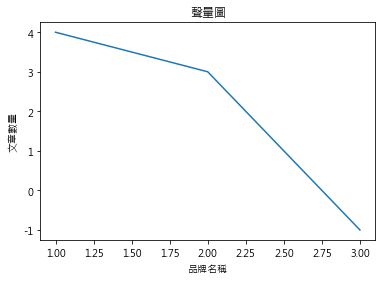

In [15]:
from matplotlib.font_manager import FontProperties 

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.plot((1,2,3),(4,3,-1))
plt.title("聲量圖")
plt.ylabel("文章數量") 
plt.xlabel("品牌名稱")  
plt.show() 

### step5 : t-SNE & plot2D
使用Sklearn TSNE <br />
參考：https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229


In [11]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [16]:

def display_closestwords_tsnescatterplot(model, word):
    arr = np.empty((0,250), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/home/aaron-lab/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
/home/aaron-lab/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/home/aaron-lab/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


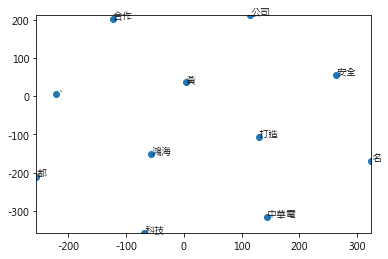

In [24]:
display_closestwords_tsnescatterplot(model, '中華電')